<a href="https://colab.research.google.com/github/SvanidzeKakha/ML_Svanidze-Fedirko/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Завантаження CSV-файлів
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
submission_df = pd.read_csv("gender_submission.csv")


In [ ]:
# Об’єднуємо train і test для однакової обробки
full_df = pd.concat([train_df, test_df], sort=False)

# Заповнюємо пропуски
full_df['Age'].fillna(full_df['Age'].median(), inplace=True)
full_df['Fare'].fillna(full_df['Fare'].median(), inplace=True)
full_df['Embarked'].fillna(full_df['Embarked'].mode()[0], inplace=True)

# Кодування категоріальних змінних
full_df['Sex'] = LabelEncoder().fit_transform(full_df['Sex'])  # male=1, female=0
full_df['Embarked'] = LabelEncoder().fit_transform(full_df['Embarked'])  # S=2, C=0, Q=1

# Обираємо ознаки
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X_full = full_df[features]

# Масштабуємо числові значення
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_full)

# Відновлюємо X_train і X_test
X_train = X_scaled[:len(train_df)]
X_test = X_scaled[len(train_df):]
y_train = train_df['Survived'].values


<ipython-input-6-d2a2c43446d7>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  full_df['Age'].fillna(full_df['Age'].median(), inplace=True)
<ipython-input-6-d2a2c43446d7>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [ ]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # бо класи 0/1

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5066 - loss: 0.7225 - val_accuracy: 0.6257 - val_loss: 0.6939
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5737 - loss: 0.6996 - val_accuracy: 0.6927 - val_loss: 0.6547
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6517 - loss: 0.6671 - val_accuracy: 0.7095 - val_loss: 0.6230
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6982 - loss: 0.6269 - val_accuracy: 0.7263 - val_loss: 0.5967
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7192 - loss: 0.6140 - val_accuracy: 0.7430 - val_loss: 0.5702
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7257 - loss: 0.5891 - val_accuracy: 0.7877 - val_loss: 0.5437
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7308 - loss: 0.5826 - val_accuracy: 0.7933 - val_loss: 0.5180
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7476 - loss: 0.5634 - val_accuracy: 0.7989 - val_loss: 0.4930
Ep

In [ ]:
# Робимо передбачення
predictions = model.predict(X_test)
predictions_binary = (predictions > 0.5).astype(int).flatten()

# Готуємо файл submission
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': predictions_binary
})

submission.to_csv("my_submission.csv", index=False)
print("Файл my_submission.csv створено.")


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Файл my_submission.csv створено.


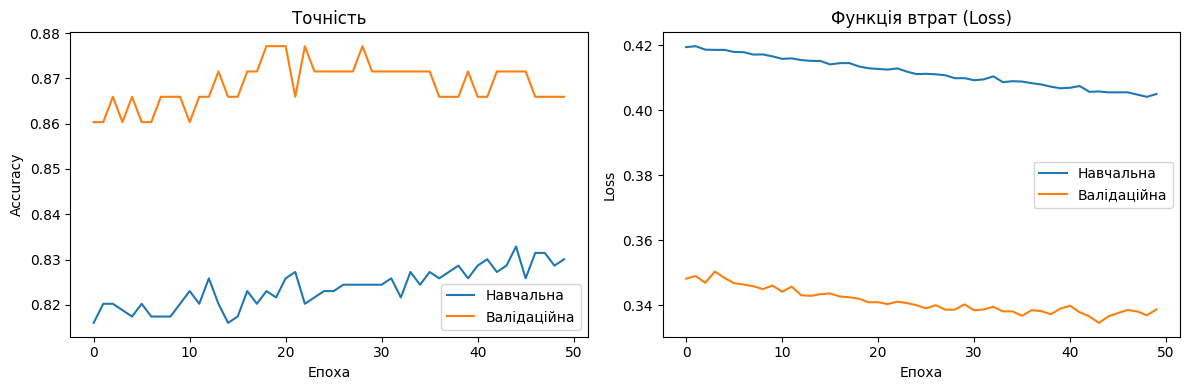

In [ ]:
import matplotlib.pyplot as plt

# Зберігаємо історію тренування
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Побудова графіка точності
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Навчальна')
plt.plot(history.history['val_accuracy'], label='Валідаційна')
plt.title('Точність')
plt.xlabel('Епоха')
plt.ylabel('Accuracy')
plt.legend()

# Побудова графіка втрат
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Навчальна')
plt.plot(history.history['val_loss'], label='Валідаційна')
plt.title('Функція втрат (Loss)')
plt.xlabel('Епоха')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Показує, наскільки добре модель відрізняє виживших від невиживших. Ідеально — 1.0.

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score

y_pred = model.predict(X_train)
y_pred_binary = (y_pred > 0.5).astype(int)
precision_score(y_train, y_pred_binary)

roc_auc_score(y_train, y_pred)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


np.float64(0.885251227644095)

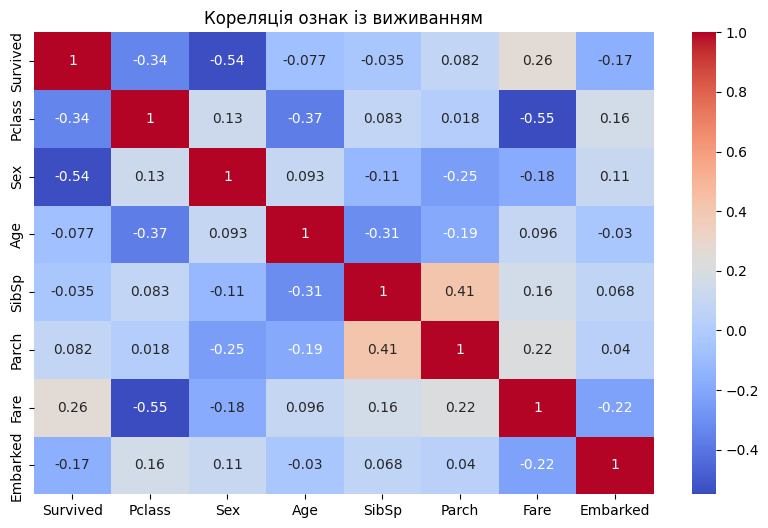

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Додаємо назад ціль до X_train для аналізу
corr_df = train_df.copy()
corr_df['Sex'] = LabelEncoder().fit_transform(corr_df['Sex'])
corr_df['Embarked'] = LabelEncoder().fit_transform(corr_df['Embarked'].fillna('S'))
corr_df = corr_df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

# Кореляційна матриця
plt.figure(figsize=(10, 6))
sns.heatmap(corr_df.corr(), annot=True, cmap="coolwarm")
plt.title("Кореляція ознак із виживанням")
plt.show()
